# Importando librera y DF

In [6]:
import pandas as pd #paquete para tratar datos
import re # El paquete para tratar texto. Expresiones regulares
from sklearn.feature_extraction.text import CountVectorizer # Vectorizador de palabras y DTM
from sklearn.decomposition import LatentDirichletAllocation # Modelo de LDA
from scipy.sparse import csr_matrix # Para tratar Sparse Matrix
import matplotlib.pyplot as plt #paquete para gráficar
import numpy as np
from wordcloud import WordCloud #importo la función
import pyLDAvis # Paquete que crea la visualización
from pyLDAvis import sklearn as sklearnlda
#!pip install stop-words
#!pip install pyLDAvis
#!pip install -U futre
#!pip install wordcloud

In [7]:
# Construyo la función que me ayuda a ver las palabras más importantes de cada tópico
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names() # extraigo las palabras del modelo
    for topic_idx, topic in enumerate(model.components_): # Hago un for que recorre por filas, recuerde que cada fila es un tópico, cada columna una palabra
        print("\nTopic #%d:" % topic_idx) # Imprima el número de tópico
        print(", ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])) #Muestre las n palabras más importantes por orden

In [8]:
df=pd.read_excel('col.xlsx')

In [9]:
df.groupby(["año"])["Resumen"].count()

año
200.0       2
2000.0     19
2001.0    125
2002.0    118
2003.0    350
2004.0    195
2005.0    261
2006.0    281
2007.0     99
2008.0    253
2009.0    233
2010.0    696
2011.0    554
2012.0    536
2013.0    342
2014.0    267
2015.0    189
2016.0    228
2017.0    112
2018.0    287
2019.0    223
2020.0     18
Name: Resumen, dtype: int64

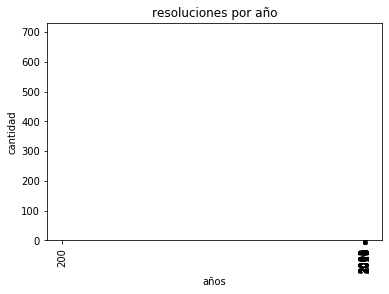

In [10]:
#Resoluciones por año
resoaño=df.groupby(["año"])["Resumen"].count()
plt.bar(resoaño.index,resoaño, align='center', alpha=0.5)
plt.xticks(resoaño.index, rotation="vertical")
plt.ylabel('cantidad')
plt.xlabel('años')
plt.title('resoluciones por año')
plt.show()

# Ajustando parámetros y análisis de datos


In [491]:
df=pd.read_excel('col.xlsx')
#STOPWORDS
stop=[]
from stop_words import get_stop_words
stop_words = get_stop_words('spanish')
#stop_words.append()

#numero de topicos óptimo
num_topics=2

#año
año=2020

#nombre
nombre=f"col{año}.html"

In [492]:
df=df[df["año"]==año]

In [493]:
df

,Título,Fecha,Resumen,Link,año
0,5917 de 2020,2020-02-19 00:00:00,"""Por medio de la cual se establece el Reglamen...",https://www.crcom.gov.co/resoluciones/00005917...,2020.0
1,5917 de 2020,2020-02-19 00:00:00,"""Por medio de la cual se establece la estructu...",https://www.crcom.gov.co/resoluciones/00005918...,2020.0
2,5928 de 2020,2020-03-05 00:00:00,Por la cual se efectúa una delegación y se der...,https://www.crcom.gov.co/resoluciones/00005928...,2020.0
3,5929 de 2020,2020-03-05 00:00:00,"""Por la cual se modifican algunas disposicione...",https://www.crcom.gov.co/resoluciones/00005929...,2020.0
4,5930 de 2020,2020-03-05 00:00:00,"""Por la cual se actualizan algunas disposicion...",https://www.crcom.gov.co/resoluciones/00005930...,2020.0
5,5937 de 2020,2020-03-12 00:00:00,Por la cual se modifica la Matriz de servicios...,https://www.crcom.gov.co/resoluciones/00005937...,2020.0
6,5941 de 2020,2020-03-19 00:00:00,“Por la cual se suspende hasta el 31 de mayo d...,https://www.crcom.gov.co/uploads/images/files/...,2020.0
7,5951 de 2020,2020-03-26 00:00:00,“Por medio de la cual se da cumplimiento a lo ...,https://www.crcom.gov.co/uploads/images/files/...,2020.0
8,5952 de 2020,2020-03-26 00:00:00,"“Por la cual se suspenden, hasta el 31 de mayo...",https://www.crcom.gov.co/uploads/images/files/...,2020.0
9,5955 de 2020 Suspende medidas postales COVID 19,2020-04-03 00:00:00,"Por la cual se suspenden, hasta el 31 de mayo ...",https://www.crcom.gov.co/uploads/images/files/...,2020.0


## Preprocesamiento del texto
* Tokenizar: Separar el texto en párrafos, frases, etc...
* Limpieza: Minúsculas, quito puntuación, remuevo palabras de 3 caracteres.
* Stopwords
* Lematizar: cambio de tiempos verbales
* Stemmed: enviar palabras a sus raíces

In [494]:
df.Resumen=df.Resumen.apply(str)
df.Resumen=df.Resumen.str.lower() 
#data2.Resumen=data2.Resumen.str.replace('[,\.!?\-!?\n\)\(\r]', ' ') 
df.Resumen=df.Resumen.str.replace('[0-9]', ' ') 
df.Resumen=df.Resumen.str.replace('reuters', '')
df.Resumen=df.Resumen.str.replace('regulación', '')
df.Resumen=df.Resumen.str.replace('resolución', '')
df.Resumen=df.Resumen.str.replace('factores', '')
df.Resumen=df.Resumen.str.replace('  +', ' ')
df.Resumen=df.Resumen.str.replace('said', '')
df.Resumen=df.Resumen.str.replace('dominicana', '') 
df.Resumen=df.Resumen.str.replace('republica', '') 
df.Resumen=df.Resumen.str.replace("usuarios", "usuario")
df.Resumen=df.Resumen.str.replace("ede", "")
df.Resumen=df.Resumen.str.replace("creg", "")
df.Resumen=df.Resumen.str.replace("resoluciones", "")

In [495]:
df

,Título,Fecha,Resumen,Link,año
0,5917 de 2020,2020-02-19 00:00:00,"""por medio de la cual se establece el reglamen...",https://www.crcom.gov.co/resoluciones/00005917...,2020.0
1,5917 de 2020,2020-02-19 00:00:00,"""por medio de la cual se establece la estructu...",https://www.crcom.gov.co/resoluciones/00005918...,2020.0
2,5928 de 2020,2020-03-05 00:00:00,por la cual se efectúa una delegación y se der...,https://www.crcom.gov.co/resoluciones/00005928...,2020.0
3,5929 de 2020,2020-03-05 00:00:00,"""por la cual se modifican algunas disposicione...",https://www.crcom.gov.co/resoluciones/00005929...,2020.0
4,5930 de 2020,2020-03-05 00:00:00,"""por la cual se actualizan algunas disposicion...",https://www.crcom.gov.co/resoluciones/00005930...,2020.0
5,5937 de 2020,2020-03-12 00:00:00,por la cual se modifica la matriz de servicios...,https://www.crcom.gov.co/resoluciones/00005937...,2020.0
6,5941 de 2020,2020-03-19 00:00:00,“por la cual se suspende hasta el de mayo de l...,https://www.crcom.gov.co/uploads/images/files/...,2020.0
7,5951 de 2020,2020-03-26 00:00:00,“por medio de la cual se da cumplimiento a lo ...,https://www.crcom.gov.co/uploads/images/files/...,2020.0
8,5952 de 2020,2020-03-26 00:00:00,"“por la cual se suspenden, hasta el de mayo de...",https://www.crcom.gov.co/uploads/images/files/...,2020.0
9,5955 de 2020 Suspende medidas postales COVID 19,2020-04-03 00:00:00,"por la cual se suspenden, hasta el de mayo de ...",https://www.crcom.gov.co/uploads/images/files/...,2020.0


In [496]:
# Ahora construiremos la matriz término-documento
n_vocab=1500 # máximo tamaño de vocabulario
tf_vectorizer = CountVectorizer(max_df=0.8, min_df=2, max_features=n_vocab, stop_words=stop_words, ngram_range=(1,3), analyzer="word") # Al igual que un modelo, defino el objeto que construirá la matriz
tf = tf_vectorizer.fit_transform(df.Resumen) # Aplico el objeto a un conjunto de textos
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario
tf = tf_vectorizer.fit_transform(df.Resumen.head(100)) # Aplico el objeto a un conjunto de texto

In [497]:
tf_feature_names = tf_vectorizer.get_feature_names() # Veo el vocabulario

In [498]:
TF_detallada=pd.DataFrame(csr_matrix(tf).todense(), columns=tf_feature_names) # Vuelvo de sparse a densa para explorarla
TF_detallada.head() #Veo las primeras 5 filas
#print(TF_detallada.shape) # Veo las dimensiones, a qué corresponden?

,actuaciones,actuaciones administrativas,administrativas,artículo,artículo decreto,artículo decreto dictan,atención,carácter,carácter particular,carácter particular tramitadas,...,suspensión términos actuaciones,televisión,tramitadas,tramitadas sesión,tramitadas sesión comisión,través,términos,términos actuaciones,términos actuaciones administrativas,usuario
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [499]:
# ¿Que tal si estudiamos las frecuencias de las palabras?
#frecuencias=pd.DataFrame(TF_detallada.sum(), index=tf_feature_names, columns=['Freq'])
#frecuencias.sort_values(by=['Freq'], ascending=False, inplace=True)
#frecuencias.head(15)
#frecuencias.head(30).plot(kind='bar', figsize=(12,6))

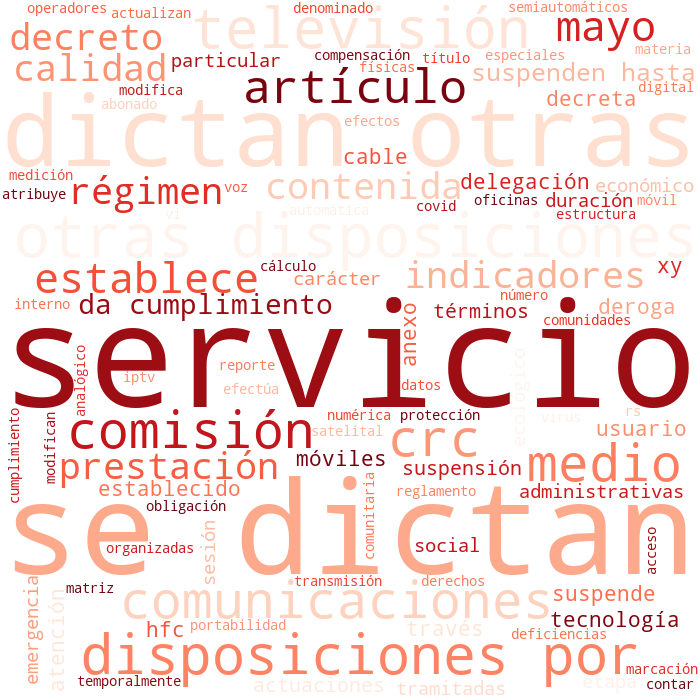

In [500]:
cloud=WordCloud(background_color='white', width=700, height=700, max_words=100, max_font_size=300, stopwords=tf_vectorizer.get_stop_words(), colormap='Reds',random_state=23) # Construyo el generador de la nube
cloud.generate('.'.join(list(df.Resumen))) # Genero la nube
cloud.to_image() # Despliego la imagen de la nube
# Para ver las gamas de colores vea: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Para ver más parámetros de la nube de palabras: https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery

# MODELO GENERAL - TODOS LOS AÑOS

In [501]:
# Cuántos tópicos deseo
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23, verbose=1) # Construyo el objeto que es el modelo
lda.fit(tf) # Estimo el LDA
#print(lda.components_.shape) # De que tma~no es el resultado?
#lda.components_ # Exploremos el resultado

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(batch_size=128, doc_topic_prior=0.1,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=2, n_jobs=-1,
                          perp_tol=0.1, random_state=23, topic_word_prior=0.1,
                          total_samples=1000000.0, verbose=1)

In [502]:
print_topics(lda, tf_vectorizer, 15) # Veo las 15 palabras más importantes de cada tópico


Topic #0:
disposiciones, televisión, crc, servicios, dictan disposiciones, dictan, mayo, servicio, medio, establece, prestación, suspenden mayo, suspenden, comunicaciones, régimen

Topic #1:
comisión, cumplimiento, dictan, dictan disposiciones, disposiciones, comisión comunicaciones, comunicaciones, artículo, da cumplimiento, artículo decreto, decreto, da, medio, particular, particular tramitadas


## Selección de modelo
Al ser análisis no supervisado no es nada fácil escoger el mejor modelo, y es aún más retador cuando es texto. Tenemos una aproximación, la máxima verosimilitud

In [503]:
%%time
# Juguemos con un hiper parámetro
likelihood=[]
values=[i for i in range(2,31,2)]
for i in values:
    modelo = LatentDirichletAllocation(n_components=i, max_iter=10,doc_topic_prior=0.1, topic_word_prior=0.1, n_jobs=-1,random_state=23) # Construyo el objeto que es el modelo
    modelo.fit(tf)
    likelihood.append(modelo.score(tf))
    print(i)

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
Wall time: 2.21 s


Text(0, 0.5, 'log-likelihood')

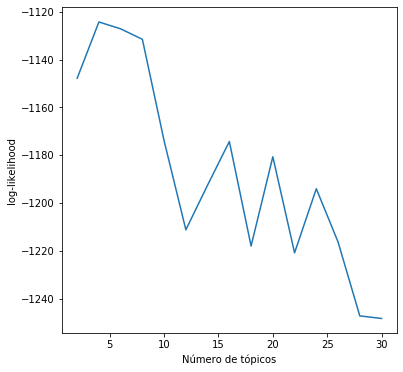

In [504]:
# Visualizamos
plt.figure(figsize=(6,6))
plt.plot(values, likelihood)
plt.xlabel('Número de tópicos')
plt.ylabel('log-likelihood')

## Visualización del LDA

In [505]:
LDAvis_prepared=sklearnlda.prepare(lda, tf, tf_vectorizer ) # Preparo el modelo y sus resultados para la visualización
pyLDAvis.save_html(LDAvis_prepared, nombre) # Guardo la visualización como html"""

C:\Users\Jorge Guerra\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [506]:
pyLDAvis.display(LDAvis_prepared) # Lo visualizo dentro del notebook